## Cal-CRAI metric calculation: built environment communication infrastructure
* num of cell towers
* num of radio towers
* num of microwave towers
* num of paging towers
* num of broadcast towers
* num of broadcast providers

In [93]:
import pandas as pd
import os
import sys
import boto3
import io
import geopandas as gpd
import numpy as np

# suppress pandas purely educational warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

sys.path.append(os.path.expanduser('../../'))
from scripts.utils.file_helpers import pull_csv_from_directory, upload_csv_aws#, pull_gpkg_from_directory
from scripts.utils.write_metadata import append_metadata

In [94]:
def pull_gpkg_from_directory(bucket_name, directory):
    """
    Pulls GeoPackage files from a specified directory in an S3 bucket.
    
    Parameters:
    - bucket_name (str): The name of the S3 bucket.
    - directory (str): The directory within the bucket to search for GeoPackage files.
    """
    # Create an S3 client
    s3 = boto3.client('s3')

    # List objects in the specified directory
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=directory)

    # Check if objects were found
    if 'Contents' in response:
        # Iterate through each object found
        for obj in response['Contents']:
            # Get the key (filename) of the object
            key = obj['Key']
            
            # Check if the object is a .gpkg file
            if key.endswith('.gpkg'):
                # Download the GeoPackage file into memory
                gpkg_object = s3.get_object(Bucket=bucket_name, Key=key)
                gpkg_data = io.BytesIO(gpkg_object['Body'].read())
                
                # Save the GeoPackage file locally
                gpkg_filename = os.path.basename(key)
                with open(gpkg_filename, 'wb') as gpkg_file:
                    gpkg_file.write(gpkg_data.getvalue())
                
                print(f"Saved GeoPackage as '{gpkg_filename}' locally")
                # You can now use the saved file for further processing
    else:
        print("No objects found in the specified directory.")


In [95]:
# pull csv from aws
bucket_name = 'ca-climate-index'
aws_dir = '2b_reproject/built_environment/communication_infrastructure/homeland_infrastructure_foundation_level_data/'

pull_gpkg_from_directory(bucket_name, aws_dir)

Saved GeoPackage as 'built_hifld_cellular_towers.gpkg' locally
Saved GeoPackage as 'built_hifld_microwave_towers.gpkg' locally
Saved GeoPackage as 'built_hifld_mobile_towers.gpkg' locally
Saved GeoPackage as 'built_hifld_paging_towers.gpkg' locally
Saved GeoPackage as 'built_hifld_radio_towers.gpkg' locally
Saved GeoPackage as 'built_hifld_tv_contour.gpkg' locally


In [96]:
cellular_towers_data = gpd.read_file('built_hifld_cellular_towers.gpkg')
print('complete')
microwave_towers_data = gpd.read_file('built_hifld_microwave_towers.gpkg')
print('complete')
mobile_towers_data = gpd.read_file('built_hifld_mobile_towers.gpkg')
print('complete')
paging_towers_data = gpd.read_file('built_hifld_paging_towers.gpkg')
print('complete')
radio_towers_data = gpd.read_file('built_hifld_radio_towers.gpkg')
print('complete')
tv_contour_data = gpd.read_file('built_hifld_tv_contour.gpkg')
print('complete')

complete
complete
complete
complete
complete
complete


In [97]:
microwave_towers_data

,OBJECTID,LicID,Licensee,Callsign,LocNum,LatDeg,LatMin,LatSec,LatDir,LonDeg,...,USCB_GEOID,USCB_NAME,USCB_NAMELSAD,USCB_MTFCC,USCB_FUNCSTAT,USCB_ALAND,USCB_AWATER,USCB_INTPTLAT,USCB_INTPTLON,geometry
0,16,954609,"KGO TELEVISION, INC.",KA2048,1,37.0,47.0,59.7,N,122.0,...,06075010500,105,Census Tract 105,G5020,S,683605,494314,+37.8026835,-122.3990500,POINT (-122.39967 37.79992)
1,22,954609,"KGO TELEVISION, INC.",KA2048,7,37.0,47.0,59.7,N,122.0,...,06075010500,105,Census Tract 105,G5020,S,683605,494314,+37.8026835,-122.3990500,POINT (-122.39967 37.79992)
2,29,954610,"KGO TELEVISION, INC.",KA2049,1,37.0,47.0,59.7,N,122.0,...,06075010500,105,Census Tract 105,G5020,S,683605,494314,+37.8026835,-122.3990500,POINT (-122.39967 37.79992)
3,978,956029,"KGO TELEVISION, INC.",KB55129,1,37.0,47.0,59.7,N,122.0,...,06075010500,105,Census Tract 105,G5020,S,683605,494314,+37.8026835,-122.3990500,POINT (-122.39967 37.79992)
4,1255,956232,"KGO TELEVISION, INC.",KB96337,1,37.0,47.0,59.7,N,122.0,...,06075010500,105,Census Tract 105,G5020,S,683605,494314,+37.8026835,-122.3990500,POINT (-122.39967 37.79992)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53820,430647,4400014,"WilloWeb, Inc.",WRKZ948,1,36.0,58.0,4.0,N,122.0,...,06087101001,1010.01,Census Tract 1010.01,G5020,S,969818,23920,+36.9663523,-122.0327054,POINT (-122.02927 36.96778)
53821,430656,4400023,Wiline Spectrum Holdings LLC,WRKZ957,1,32.0,49.0,33.0,N,117.0,...,06073008501,85.01,Census Tract 85.01,G5020,S,3039525,0,+32.8318579,-117.2237844,POINT (-117.22669 32.82583)
53822,430788,4402950,"One Ring Networks, Inc.",WRLD360,1,33.0,44.0,50.1,N,116.0,...,06065045306,453.06,Census Tract 453.06,G5020,S,3373729,0,+33.7413288,-116.2079900,POINT (-116.20539 33.74725)
53823,430840,4421093,Cellco Partnership,WRMA446,1,37.0,45.0,32.3,N,122.0,...,06001430102,4301.02,Census Tract 4301.02,G5020,S,77663212,3506442,+37.7674981,-122.0500120,POINT (-122.12236 37.75897)


In [98]:
tv_contour_data.columns

Index(['OBJECTID', 'CALL', 'PREFIX', 'ARN', 'SERVICE', 'ID', 'ID0', 'PURPOSE',
       'APP_STATUS', 'DATE', 'FAC_STATUS', 'DATE0', 'LICENSEE', 'STATUS',
       'STATE', 'CITY', 'CHANNEL', 'LON', 'LAT', 'CONTOUR', 'GlobalID',
       'SHAPE_Leng', 'SHAPE_Area', 'USCB_STATEFP', 'USCB_COUNTYFP',
       'USCB_TRACTCE', 'USCB_GEOID', 'USCB_NAME', 'USCB_NAMELSAD',
       'USCB_MTFCC', 'USCB_FUNCSTAT', 'USCB_ALAND', 'USCB_AWATER',
       'USCB_INTPTLAT', 'USCB_INTPTLON', 'geometry'],
      dtype='object')

In [99]:
def county_count(df, county_col, county, counter):
    county_isolate = df[df[county_col]==county]
    county_isolate_drop_duplicates= county_isolate.drop_duplicates(subset=[county_col, counter])
    print(f'Length of df for {county} county without dropping duplicates:  {len(county_isolate)}')
    print(f'Length of df for {county} county after dropping duplicates: {len(county_isolate_drop_duplicates)}')

county_count(microwave_towers_data, 'LocCounty', 'SANTA CLARA', 'Callsign')

Length of df for SANTA CLARA county without dropping duplicates:  1227
Length of df for SANTA CLARA county after dropping duplicates: 1048


In [100]:
Fresno = paging_towers_data[paging_towers_data['LocCounty']=='FRESNO']
#Fresno = Fresno[Fresno['cellular_towers_data_count'].notna()]
#pd.set_option('display.max_rows', None)  # None means display all rows
iso_fresno = Fresno.drop_duplicates(subset=['LocCounty', 'UniqSysID'])

iso_fresno.head()

,UniqSysID,Licensee,Callsign,LocNum,LatDeg,LatMin,LatSec,LatDir,LonDeg,LonMin,...,USCB_GEOID,USCB_NAME,USCB_NAMELSAD,USCB_MTFCC,USCB_FUNCSTAT,USCB_ALAND,USCB_AWATER,USCB_INTPTLAT,USCB_INTPTLON,geometry
31,2305,"Spok, Inc.",KNKG834,29,37.0,4.0,25.8,N,119.0,25.0,...,06019006409,64.09,Census Tract 64.09,G5020,S,560488497,15925621,+37.2058395,-119.2805522,POINT (-119.43039 37.07383)
179,1173,Fresno Mobile Radio Co.,KMA830,1,36.0,18.0,18.8,N,120.0,24.0,...,06019007903,79.03,Census Tract 79.03,G5020,S,1823994219,976972,+36.2042510,-120.4089333,POINT (-120.40347 36.30522)
270,1180,"AMS Spectrum Holdings, LLC",KMB305,42,37.0,4.0,10.8,N,119.0,25.0,...,06019006409,64.09,Census Tract 64.09,G5020,S,560488497,15925621,+37.2058395,-119.2805522,POINT (-119.42761 37.06967)
298,2832,"Vincent Communications, Inc",KNKK227,1,36.0,55.0,48.8,N,119.0,38.0,...,06019006405,64.05,Census Tract 64.05,G5020,S,353743597,11890100,+37.0042938,-119.5635349,POINT (-119.63875 36.93022)
300,2834,"Vincent Communications, Inc",KNKK231,1,36.0,44.0,6.8,N,119.0,47.0,...,06019000100,1,Census Tract 1,G5020,S,843445,0,+36.7369244,-119.7927732,POINT (-119.78708 36.73522)


In [101]:
# Read in CA census tiger file
census_shp_dir = "s3://ca-climate-index/0_map_data/2021_tiger_census_tract/2021_ca_tract/"
ca_boundaries = gpd.read_file(census_shp_dir)

# Select columns and rename
filtered_ca_boundaries = ca_boundaries[['GEOID', 'geometry']].copy()
filtered_ca_boundaries.rename(columns={'GEOID': 'tract'}, inplace=True)

# Modify 'tract' column
filtered_ca_boundaries['tract'] = filtered_ca_boundaries['tract'].str[1:]
filtered_ca_boundaries = filtered_ca_boundaries.to_crs(crs=4269) 
# Output the modified GeoDataFrame
filtered_ca_boundaries

,tract,geometry
0,6085504321,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,6085504410,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,6085507003,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,6085507004,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,6085502204,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."
...,...,...
9124,6059001303,"POLYGON ((-117.95917 33.92458, -117.95888 33.9..."
9125,6059001304,"POLYGON ((-117.95918 33.92820, -117.95831 33.9..."
9126,6059001401,"POLYGON ((-117.95056 33.94503, -117.95055 33.9..."
9127,6013367200,"POLYGON ((-122.34551 37.96355, -122.34550 37.9..."


In [102]:
# read in CA census tiger file
ca_tract_county = "s3://ca-climate-index/0_map_data/ca_tracts_county.csv"
ca_tract_county = gpd.read_file(ca_tract_county)
ca_tract_county = ca_tract_county.drop(columns={'field_1', 'geometry'})
ca_tract_county.columns = ca_tract_county.columns.str.lower()
ca_tract_county = ca_tract_county.applymap(lambda s: s.lower() if type(s) == str else s)

ca_tract_county

,tract,countyfp,county
0,06085504321,085,santa clara
1,06085504410,085,santa clara
2,06085507003,085,santa clara
3,06085507004,085,santa clara
4,06085502204,085,santa clara
...,...,...,...
9124,06059001303,059,orange
9125,06059001304,059,orange
9126,06059001401,059,orange
9127,06013367200,013,contra costa


In the following cells, look at columns from each dataset and identify which column is the identifier (noted by comment value)

In [103]:
cellular_towers_data.columns # uniqsysid

Index(['OBJECTID', 'UniqSysID', 'Licensee', 'Callsign', 'LocNum', 'LatDeg',
       'LatMin', 'LatSec', 'LatDir', 'LonDeg', 'LonMin', 'LonSec', 'LonDir',
       'LocAdd', 'LocCity', 'LocCounty', 'LocState', 'Nepa', 'QZone', 'TowReg',
       'SupStruc', 'AllStruc', 'StrucType', 'LicStatus', 'latdec', 'londec',
       'url', 'USCB_STATEFP', 'USCB_COUNTYFP', 'USCB_TRACTCE', 'USCB_GEOID',
       'USCB_NAME', 'USCB_NAMELSAD', 'USCB_MTFCC', 'USCB_FUNCSTAT',
       'USCB_ALAND', 'USCB_AWATER', 'USCB_INTPTLAT', 'USCB_INTPTLON',
       'geometry'],
      dtype='object')

In [104]:
microwave_towers_data.columns #callsign

Index(['OBJECTID', 'LicID', 'Licensee', 'Callsign', 'LocNum', 'LatDeg',
       'LatMin', 'LatSec', 'LatDir', 'LonDeg', 'LonMin', 'LonSec', 'LonDir',
       'LocAdd', 'LocCity', 'LocCounty', 'LocState', 'Nepa', 'QZone', 'TowReg',
       'SupStruc', 'AllStruc', 'StrucType', 'LicStatus', 'latdec', 'londec',
       'url', 'GlobalID', 'USCB_STATEFP', 'USCB_COUNTYFP', 'USCB_TRACTCE',
       'USCB_GEOID', 'USCB_NAME', 'USCB_NAMELSAD', 'USCB_MTFCC',
       'USCB_FUNCSTAT', 'USCB_ALAND', 'USCB_AWATER', 'USCB_INTPTLAT',
       'USCB_INTPTLON', 'geometry'],
      dtype='object')

In [105]:
mobile_towers_data.columns #uniqsysid

Index(['OBJECTID', 'UniqSysID', 'Licensee', 'Callsign', 'LocNum', 'LatDeg',
       'LatMin', 'LatSec', 'LatDir', 'LonDeg', 'LonMin', 'LonSec', 'LonDir',
       'LocAdd', 'LocCity', 'LocCounty', 'LocState', 'Nepa', 'QZone', 'TowReg',
       'SupStruc', 'AllStruc', 'StrucType', 'LicStatus', 'latdec', 'londec',
       'url', 'USCB_STATEFP', 'USCB_COUNTYFP', 'USCB_TRACTCE', 'USCB_GEOID',
       'USCB_NAME', 'USCB_NAMELSAD', 'USCB_MTFCC', 'USCB_FUNCSTAT',
       'USCB_ALAND', 'USCB_AWATER', 'USCB_INTPTLAT', 'USCB_INTPTLON',
       'geometry'],
      dtype='object')

In [106]:
paging_towers_data.columns # uniqsysid

Index(['UniqSysID', 'Licensee', 'Callsign', 'LocNum', 'LatDeg', 'LatMin',
       'LatSec', 'LatDir', 'LonDeg', 'LonMin', 'LonSec', 'LonDir', 'LocAdd',
       'LocCity', 'LocCounty', 'LocState', 'Nepa', 'QZone', 'TowReg',
       'SupStruc', 'AllStruc', 'StrucType', 'LicStatus', 'RSC', 'latdec',
       'londec', 'url', 'USCB_STATEFP', 'USCB_COUNTYFP', 'USCB_TRACTCE',
       'USCB_GEOID', 'USCB_NAME', 'USCB_NAMELSAD', 'USCB_MTFCC',
       'USCB_FUNCSTAT', 'USCB_ALAND', 'USCB_AWATER', 'USCB_INTPTLAT',
       'USCB_INTPTLON', 'geometry'],
      dtype='object')

In [107]:
radio_towers_data.columns # CALLSIGN

Index(['OBJECTID', 'CALLSIGN', 'FREQUENCY', 'SERVICE', 'CLASS', 'STATUS',
       'CITY', 'STATE', 'COUNTRY', 'FILENUM', 'FACID', 'LAT', 'LON',
       'LICENSEE', 'LATDD', 'LONDD', 'USCB_STATEFP', 'USCB_COUNTYFP',
       'USCB_TRACTCE', 'USCB_GEOID', 'USCB_NAME', 'USCB_NAMELSAD',
       'USCB_MTFCC', 'USCB_FUNCSTAT', 'USCB_ALAND', 'USCB_AWATER',
       'USCB_INTPTLAT', 'USCB_INTPTLON', 'geometry'],
      dtype='object')

In [108]:
communication_infrastructure_data = [cellular_towers_data, microwave_towers_data, mobile_towers_data, paging_towers_data, radio_towers_data, tv_contour_data]
words_to_search = ['OBJECTID','UniqSysID', 'USCB_COUNTYFP', 'ID', 'Licensee', 'CALLSIGN', 'Callsign','LocCounty', 'geometry']

def filter_and_spatial_join(data_list, filtered_ca_boundaries, words_to_search, ca_tract_county):
    county_count_dfs = {}
    
    for df, df_name in zip(data_list, ['cellular_towers_data', 'microwave_towers_data', 'mobile_towers_data', 'paging_towers_data', 'radio_towers_data', 'tv_contour_data']):        
        # Filter columns based on words_to_search
        filtered_df = df[[col for col in df.columns if any(word in col for word in words_to_search)]].copy()
        filtered_df.index = df.index
        filtered_df = filtered_df.to_crs(crs=4269)

        # Convert all string columns to lowercase
        str_columns = filtered_df.select_dtypes(include=['object']).columns
        for col in str_columns:
            filtered_df[col] = filtered_df[col].str.lower()

        # Perform the spatial join
        joined_df = gpd.sjoin(filtered_df, filtered_ca_boundaries, how='right', predicate='within')
        
        # Ensure necessary columns are retained
        necessary_columns = ['Callsign', 'CALLSIGN', 'ID', 'UniqSysID', 'LocCounty', 'USCB_COUNTYFP']
        joined_df = joined_df[[col for col in necessary_columns if col in joined_df.columns]].copy()
                
        # Use 'UniqSysID' if it exists, otherwise use 'OBJECTID'
        if 'UniqSysID' in joined_df.columns:
            id_column = 'UniqSysID'
        elif 'Callsign' in joined_df.columns:
            id_column = 'Callsign'
        elif 'CALLSIGN' in joined_df.columns:
            id_column = 'CALLSIGN'
        elif 'ID' in joined_df.columns:
            id_column = 'ID'
        else:
            raise ValueError(f"Neither 'UniqSysID' nor 'OBJECTID' found in the DataFrame for {df_name}")
        
        # Determine county_id
        if 'LocCounty' in joined_df.columns:
            joined_df = joined_df.rename(columns={'LocCounty':'county'})
            county_id = 'county'
        elif 'USCB_COUNTYFP' in joined_df.columns:
            joined_df = joined_df.rename(columns={'USCB_COUNTYFP':'countyfp'})
            county_id = 'countyfp'
        else:
            raise ValueError(f"Neither 'LocCounty' nor 'USCB_COUNTYFP' found in the DataFrame for {df_name}")

        # Remove duplicates based on county and the chosen ID column
        unique_communication_structures_county = joined_df.drop_duplicates(subset=[county_id, id_column])

        county_power_counts = unique_communication_structures_county.groupby(county_id)[id_column].apply(lambda x: x.notnull().sum()).reset_index(name=f"{df_name}_count")
        
        # Merge with ca_tract_county
        merged_df = pd.merge(ca_tract_county, county_power_counts, on=county_id, how='left')
        
        county_df_name = f"county_count_{df_name}"
        
        county_count_dfs[county_df_name] = merged_df
        
        # Dynamically create global variables
        globals()[county_df_name] = merged_df
        
        print(county_df_name)
    
    return county_count_dfs

county_count_dfs = filter_and_spatial_join(communication_infrastructure_data, filtered_ca_boundaries, words_to_search, ca_tract_county)

county_count_cellular_towers_data
county_count_microwave_towers_data
county_count_mobile_towers_data
county_count_paging_towers_data
county_count_radio_towers_data
county_count_tv_contour_data


In [109]:
county_count_tv_contour_data

,tract,countyfp,county,tv_contour_data_count
0,06085504321,085,santa clara,11.0
1,06085504410,085,santa clara,11.0
2,06085507003,085,santa clara,11.0
3,06085507004,085,santa clara,11.0
4,06085502204,085,santa clara,11.0
...,...,...,...,...
9124,06059001303,059,orange,12.0
9125,06059001304,059,orange,12.0
9126,06059001401,059,orange,12.0
9127,06013367200,013,contra costa,13.0


In [110]:
# helper function to identify data min/maxes -- can go into utils
def data_stats_check(df, col):
    print('Calculating stats on {}...'.format(col))
    print('Data min: ', df[col].min())
    print('Data max: ', df[col].max())
    print('Data mean: ', df[col].mean())
    print('\n')

In [111]:
data_stats_check(county_count_cellular_towers_data, 'cellular_towers_data_count')
data_stats_check(county_count_microwave_towers_data, 'microwave_towers_data_count')
data_stats_check(county_count_mobile_towers_data, 'mobile_towers_data_count')
data_stats_check(county_count_paging_towers_data, 'paging_towers_data_count')
data_stats_check(county_count_radio_towers_data, 'radio_towers_data_count')
data_stats_check(county_count_tv_contour_data, 'tv_contour_data_count')

Calculating stats on cellular_towers_data_count...
Data min:  1
Data max:  14
Data mean:  3.587468506955855


Calculating stats on microwave_towers_data_count...
Data min:  12
Data max:  4048
Data mean:  1594.2968561726366


Calculating stats on mobile_towers_data_count...
Data min:  1.0
Data max:  117.0
Data mean:  51.81547552681458


Calculating stats on paging_towers_data_count...
Data min:  1.0
Data max:  25.0
Data mean:  16.021545564471804


Calculating stats on radio_towers_data_count...
Data min:  1.0
Data max:  88.0
Data mean:  42.019283444724444


Calculating stats on tv_contour_data_count...
Data min:  1.0
Data max:  18.0
Data mean:  12.647110428775084




In [37]:
county_count_microwave_towers_data.loc[county_count_microwave_towers_data.county=='los angeles']

,tract,countyfp,county,microwave_towers_data_count
223,06037137000,037,los angeles,4048
415,06037541605,037,los angeles,4048
416,06037541801,037,los angeles,4048
427,06037541802,037,los angeles,4048
428,06037542000,037,los angeles,4048
...,...,...,...,...
9110,06037480902,037,los angeles,4048
9111,06037189600,037,los angeles,4048
9112,06037189400,037,los angeles,4048
9113,06037181400,037,los angeles,4048


In [112]:
county_count_cellular_towers_data.to_csv('built_cellular_towers_metric.csv', index=False)
county_count_microwave_towers_data.to_csv('built_microwave_towers_metric.csv', index=False)
county_count_mobile_towers_data.to_csv('built_mobile_towers_metric.csv', index=False)
county_count_paging_towers_data.to_csv('built_paging_towers_metric.csv', index=False)
county_count_radio_towers_data.to_csv('built_radio_towers_metric.csv', index=False)
county_count_tv_contour_data.to_csv('built_tv_contours_metric.csv', index=False)


In [4]:
# pull csv from aws
bucket_name = 'ca-climate-index'
aws_dir = '2b_reproject/built_environment/communication_infrastructure/ca_public_utilities_commission/'

pull_gpkg_from_directory(bucket_name, aws_dir)

KeyboardInterrupt: 

In [35]:
broadband_internet_data = gpd.read_file('built_cpuc_internet.gpkg')
broadband_internet_data = broadband_internet_data.to_crs(crs=4269) 

In [6]:
broadband_internet_data.columns

Index(['BlockCode', 'MaxAdDn', 'Shape_Length', 'Shape_Area', 'USCB_STATEFP',
       'USCB_COUNTYFP', 'USCB_TRACTCE', 'USCB_GEOID', 'USCB_NAME',
       'USCB_NAMELSAD', 'USCB_MTFCC', 'USCB_FUNCSTAT', 'USCB_ALAND',
       'USCB_AWATER', 'USCB_INTPTLAT', 'USCB_INTPTLON', 'geometry'],
      dtype='object')

<Axes: >

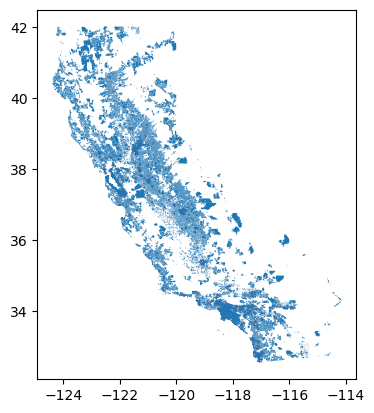

In [7]:
broadband_internet_data.plot()

In [38]:
columns_keep = ['USCB_GEOID', 'MaxAdDn', 'geometry']
filtered_broadband_internet = broadband_internet_data[columns_keep].copy()
filtered_broadband_internet = filtered_broadband_internet.drop_duplicates(subset=['USCB_GEOID', 'MaxAdDn'])
filtered_broadband_internet = filtered_broadband_internet.rename(columns={'USCB_GEOID':'tract'})
filtered_broadband_internet['tract'] = filtered_broadband_internet['tract'].str.lstrip('0')

filtered_broadband_internet

,tract,MaxAdDn,geometry
0,6001400100,45.0,"POLYGON ((-122.24587 37.88302, -122.24591 37.8..."
1,6001400100,1200.0,"POLYGON ((-122.23970 37.86876, -122.23882 37.8..."
44,6001400100,25.0,"MULTIPOLYGON (((-122.22344 37.85473, -122.2234..."
54,6001400100,1000.0,"POLYGON ((-122.24438 37.85983, -122.24440 37.8..."
62,6001400100,12.0,"POLYGON ((-122.24633 37.88023, -122.24617 37.8..."
...,...,...,...
466082,6115040902,60.0,"MULTIPOLYGON (((-121.34958 39.08192, -121.3494..."
466083,6115040902,100.0,"POLYGON ((-121.41151 39.17366, -121.41192 39.1..."
466085,6115040902,50.0,"POLYGON ((-121.46755 39.15791, -121.46755 39.1..."
466087,6115040902,1200.0,"POLYGON ((-121.38575 39.11928, -121.38559 39.1..."


## Take a look at a specified tract and see its broadband download entries

In [87]:
filtered_rows = filtered_broadband_internet[filtered_broadband_internet['tract'] == '6059001304']
filtered_rows

,tract,MaxAdDn,geometry
217887,6059001304,50.0,"POLYGON ((-117.95918 33.92804, -117.95918 33.9..."
217888,6059001304,25.0,"POLYGON ((-117.95888 33.92458, -117.95800 33.9..."
217889,6059001304,1000.0,"POLYGON ((-117.94593 33.92314, -117.94542 33.9..."
217897,6059001304,12.0,"POLYGON ((-117.94175 33.92762, -117.94175 33.9..."
217898,6059001304,2000.0,"POLYGON ((-117.94587 33.92716, -117.94583 33.9..."
217900,6059001304,1.0,"POLYGON ((-117.94483 33.92459, -117.94445 33.9..."
217904,6059001304,6.0,"POLYGON ((-117.94373 33.91752, -117.94002 33.9..."
217906,6059001304,115.0,"POLYGON ((-117.95482 33.92764, -117.95482 33.9..."
217918,6059001304,100.0,"POLYGON ((-117.94373 33.91734, -117.94299 33.9..."


## Filter for download speed below 25mb/s per Cal-CRAI metric

In [88]:
low_broadband_download = filtered_broadband_internet[filtered_broadband_internet['MaxAdDn'] < 25]
low_broadband_download

,tract,MaxAdDn,geometry
62,6001400100,12.0,"POLYGON ((-122.24633 37.88023, -122.24617 37.8..."
88,6013354001,18.0,"POLYGON ((-122.18358 37.87851, -122.18388 37.8..."
113,6001422700,18.0,"POLYGON ((-122.25275 37.86956, -122.25402 37.8..."
1737,6001402801,18.0,"POLYGON ((-122.26969 37.80896, -122.26955 37.8..."
1760,6001402900,18.0,"POLYGON ((-122.26834 37.80900, -122.26845 37.8..."
...,...,...,...
465995,6115040800,10.0,"POLYGON ((-121.47067 39.04866, -121.47067 39.0..."
465999,6115040800,3.0,"POLYGON ((-121.46841 39.05847, -121.46841 39.0..."
466014,6115040800,12.0,"POLYGON ((-121.44241 39.00756, -121.44164 39.0..."
466032,6115040800,18.0,"POLYGON ((-121.43160 39.00404, -121.43161 39.0..."


<Axes: >

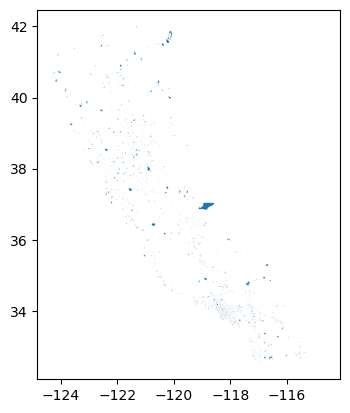

In [89]:
low_broadband_download.plot()

## Spatially join the low broadband internet data with our California county data
* add a flag for any tract that contains <25 download speeds

In [81]:
low_broadband_download = low_broadband_download.drop(columns='tract')
joined_df = gpd.sjoin(low_broadband_download, filtered_ca_boundaries, how='right', predicate='within')
joined_df= joined_df.drop_duplicates(subset='tract')
joined_df['low_internet_download_flag'] = np.where(joined_df['MaxAdDn'].notna(), 1, 0)
joined_df = joined_df.drop(columns=['index_left', 'geometry'])

joined_df

,MaxAdDn,tract,low_internet_download_flag
0,NaN,6085504321,0
1,NaN,6085504410,0
2,1.0,6085507003,1
3,NaN,6085507004,0
4,NaN,6085502204,0
...,...,...,...
9124,NaN,6059001303,0
9125,6.0,6059001304,1
9126,NaN,6059001401,0
9127,NaN,6013367200,0


## Cleanup the final datafram to hold only relevant columns

In [83]:
# Define the new order of columns
new_column_order = ['tract', 'MaxAdDn', 'low_internet_download_flag']

# Reassign the DataFrame with the new order of columns
low_internet_merged = joined_df[new_column_order]
low_internet_merged

,tract,MaxAdDn,low_internet_download_flag
0,6085504321,NaN,0
1,6085504410,NaN,0
2,6085507003,1.0,1
3,6085507004,NaN,0
4,6085502204,NaN,0
...,...,...,...
9124,6059001303,NaN,0
9125,6059001304,6.0,1
9126,6059001401,NaN,0
9127,6013367200,NaN,0


## Take a look at specified tracts to cross reference with the original broadband data

In [86]:
filtered_rows = joined_df[joined_df['tract'] == '6059001304']
filtered_rows

,MaxAdDn,tract,low_internet_download_flag
9125,6.0,6059001304,1


In [90]:
low_internet_merged.to_csv('built_broadband_internet_metric.csv', index=False)


Function Call

In [113]:
files_upload = ['built_cellular_towers_metric.csv',
                'built_radio_towers_metric',
                'built_mobile_towers_metric.csv',
                'built_paging_towers_metric.csv',
                'built_radio_towers_metric.csv',
                'built_tv_contours_metric.csv',
                'built_broadband_internet_metric.csv'
                ]

In [ ]:
@append_metadata
def communication_infrastructure_upload(input_csv, export=False, varname=''):
    '''
    Uploads prepared wastewater treatment facilities metric csv to S3 bucket. The metrics is:
    # of operating wastewater treatment facilities per California county.

    Data for this metric was sourced from California State Water Resources Control Board at:
    https://www.waterboards.ca.gov/water_issues/programs/npdes/permit_search.html within the Interactive Regulated Facilities Report.

    Methods
    -------
    The original data file was a .xls file, which was converted to a .csv for easier processing.
    Columns were adjusted and summed to calculate total facilities that include wastewater treatment.
    Total facility columns and the county column were retained and merged with California 2021 tiger census tract and county data.
    
    Parameters
    ----------
    input_csv: string
        csv wastewater facility data 
    export: True/False boolean
        False = will not upload resulting df containing CAL CRAI wastewater treatment facility metric to AWS
        True = will upload resulting df containing CAL CRAI wastewater treatment facility metric to AWS

    Script
    ------
    built_wastewater_treatment.ipynb

    Note:
    This function assumes users have configured the AWS CLI such that their access key / secret key pair are stored in ~/.aws/credentials.
    See https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html for guidance.
    '''
    print('Data transformation: data cleaned by isolating and renaming relevant columns.')
    print('Data transformation: an additional column was calculated by summing all columns.')
    print('Data transformation: data was merged to California census tract and county data.')
 
    if export == True:
        bucket_name = 'ca-climate-index'
        directory = '3_fair_data/index_data'
        export_filename = [input_csv]
        upload_csv_aws(export_filename, bucket_name, directory)

    if export == False:
        print('built_wastewater_treatment_facilities_metric.csv uploaded to AWS.')
 
    if os.path.exists(input_csv):
        os.remove(input_csv)